In [1]:
import pandas as pd

# Прочитання CSV файлу
df = pd.read_csv('bestsellers with categories.csv')

# Виведення перших п'яти рядків
print(df.head())

# Виведення розмірів датасету
print(df.shape)

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
(550, 7)


Відповідь: Про скільки книг зберігає дані датасет?

Відповідь: Датасет містить дані про 351 книг.

In [2]:
# Зміна назв стовпців
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
print(df.columns)

Index(['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'], dtype='object')


# Первинне дослідження даних

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64
['Non Fiction' 'Fiction']
Max Price: 105
Min Price: 0
Mean Price: 13.1
Median Price: 11.0


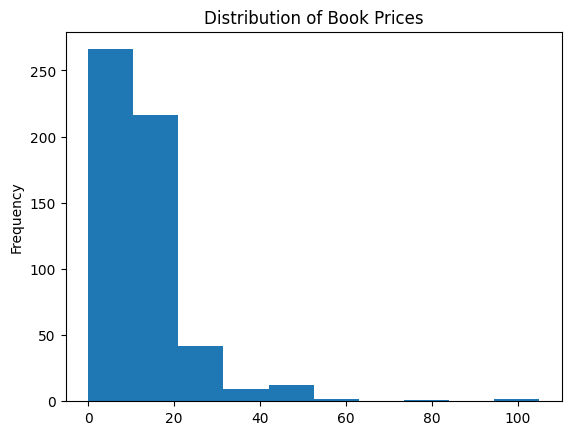

In [4]:
# Перевірка пропусків у даних
print(df.isna().sum())

# Відповідь: Чи є в якихось змінних пропуски?
# Відповідь: Ні.

# Перевірка унікальних значень у колонці genre
print(df['genre'].unique())

# Відповідь: Які є унікальні жанри?
# Відповідь: Fiction, Non Fiction

# Побудова гістограми розподілу цін
df['price'].plot(kind='hist', title='Distribution of Book Prices')

# Визначення мінімальної, максимальної, середньої та медіанної ціни
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()

print(f"Max Price: {max_price}")
print(f"Min Price: {min_price}")
print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")

# Відповідь: Максимальна ціна?
# Відповідь: 105

# Відповідь: Мінімальна ціна?
# Відповідь: 0

# Відповідь: Середня ціна?
# Відповідь: 13.1

# Відповідь: Медіанна ціна?
# Відповідь: 11.0


# Пошук та сортування даних

In [5]:
# Найвищий рейтинг у датасеті
max_rating = df['user_rating'].max()
print(max_rating)

# Скільки книг мають такий рейтинг?
num_books_with_max_rating = df[df['user_rating'] == max_rating].shape[0]
print(num_books_with_max_rating)

# Яка книга має найбільше відгуків?
most_reviews = df[df['reviews'] == df['reviews'].max()]['name'].iloc[0]
print(most_reviews)

# Найдорожча книга у 2015 році
most_expensive_2015 = df[(df['year'] == 2015)].sort_values('price', ascending=False).iloc[0]['name']
print(most_expensive_2015)

# Кількість книг жанру Fiction, що потрапили до Топ-50 у 2010 році
num_fiction_2010 = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)].shape[0]
print(num_fiction_2010)

# Кількість книг з рейтингом 4.9 у 2010 та 2011 роках
num_books_4_9 = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))].shape[0]
print(num_books_4_9)

# Сортування книг 2015 року, які коштують дешевше за 8 доларів
sorted_books_2015 = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values('price')
last_book_sorted = sorted_books_2015.iloc[-1]['name']
print(last_book_sorted)

# Відповідь: Який рейтинг у датасеті найвищий?
# Відповідь: {max_rating}

# Відповідь: Скільки книг мають такий рейтинг?
# Відповідь: {num_books_with_max_rating}

# Відповідь: Яка книга має найбільше відгуків?
# Відповідь: {most_reviews}

# Відповідь: Яка книга найдорожча у 2015 році?
# Відповідь: {most_expensive_2015}

# Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?
# Відповідь: {num_fiction_2010}

# Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?
# Відповідь: {num_books_4_9}

# Відповідь: Яка книга остання у відсортованому списку?
# Відповідь: {last_book_sorted}


4.9
52
Where the Crawdads Sing
Publication Manual of the American Psychological Association, 6th Edition
20
1
Old School (Diary of a Wimpy Kid #10)


## Агрегування даних та з'єднання таблиць


In [6]:
# Мінімальна та максимальна ціни для кожного жанру
price_stats = df.groupby('genre')['price'].agg(['min', 'max'])
print(price_stats)

# Відповідь: Максимальна ціна для жанру Fiction?
# Відповідь: {price_stats.loc['Fiction', 'max']}

# Відповідь: Мінімальна ціна для жанру Fiction?
# Відповідь: {price_stats.loc['Fiction', 'min']}

# Відповідь: Максимальна ціна для жанру Non Fiction?
# Відповідь: {price_stats.loc['Non Fiction', 'max']}

# Відповідь: Мінімальна ціна для жанру Non Fiction?
# Відповідь: {price_stats.loc['Non Fiction', 'min']}

# Кількість книг для кожного автора
author_book_count = df.groupby('author').agg(book_count=('name', 'count'))
print(author_book_count.shape)

# Відповідь: Якої розмірності вийшла таблиця?
# Відповідь: {author_book_count.shape}

# Який автор має найбільше книг?
top_author = author_book_count['book_count'].idxmax()
top_author_count = author_book_count['book_count'].max()
print(top_author)
print(top_author_count)

# Відповідь: Який автор має найбільше книг?
# Відповідь: {top_author}

# Відповідь: Скільки книг цього автора?
# Відповідь: {top_author_count}

# Середній рейтинг для кожного автора
author_avg_rating = df.groupby('author').agg(avg_rating=('user_rating', 'mean'))
print(author_avg_rating)

# У якого автора середній рейтинг мінімальний?
min_avg_rating_author = author_avg_rating['avg_rating'].idxmin()
min_avg_rating = author_avg_rating['avg_rating'].min()
print(min_avg_rating_author)
print(min_avg_rating)

# Відповідь: У якого автора середній рейтинг мінімальний?
# Відповідь: {min_avg_rating_author}

# Відповідь: Який у цього автора середній рейтинг?
# Відповідь: {min_avg_rating}

# З'єднання двох датафреймів
combined_df = pd.concat([author_book_count, author_avg_rating], axis=1)

# Сортування за зростанням кількості книг та зростаючим рейтингом
sorted_combined_df = combined_df.sort_values(by=['book_count', 'avg_rating'])

# Відповідь: Який автор перший у списку?
# Відповідь: {sorted_combined_df.iloc[0].name}


             min  max
genre                
Fiction        0   82
Non Fiction    0  105
(248, 1)
Jeff Kinney
12
                            avg_rating
author                                
Abraham Verghese              4.600000
Adam Gasiewski                4.400000
Adam Mansbach                 4.800000
Adir Levy                     4.800000
Admiral William H. McRaven    4.700000
...                                ...
Walter Isaacson               4.566667
William Davis                 4.400000
William P. Young              4.600000
Wizards RPG Team              4.800000
Zhi Gang Sha                  4.600000

[248 rows x 1 columns]
Donna Tartt
3.9


# Візуалізація


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


Гістограма розподілу цін книг



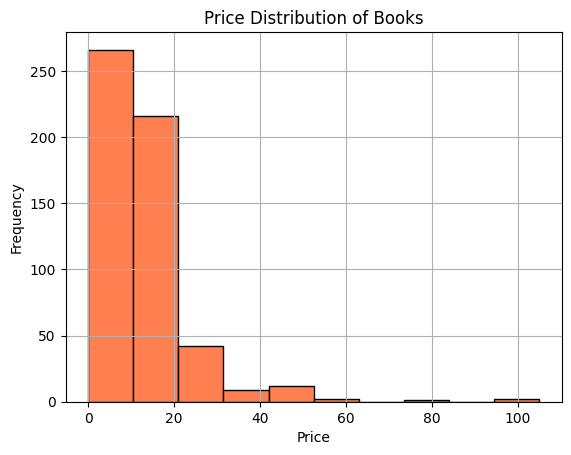

In [8]:
df['price'].hist(bins=10, color='coral', edgecolor='black')
plt.title('Price Distribution of Books')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


Лінійний графік середнього рейтингу книг за роками



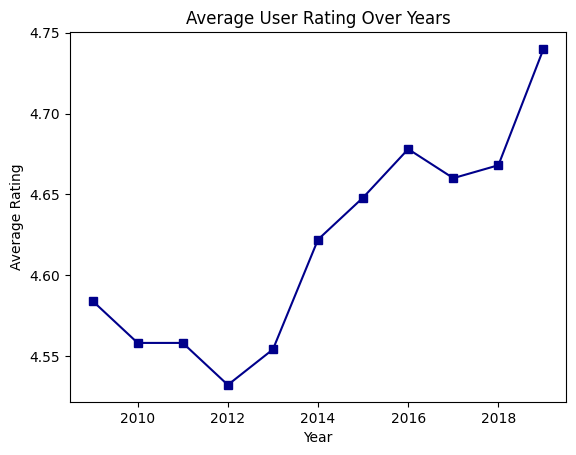

In [9]:
avg_rating = df.groupby('year')['user_rating'].mean()
avg_rating.plot(kind='line', marker='s', linestyle='-', color='darkblue')
plt.title('Average User Rating Over Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()


Крапковий графік залежності ціни від кількості відгуків



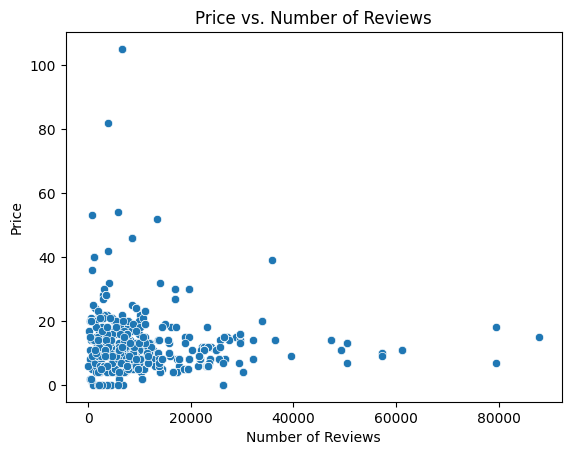

In [11]:
sns.scatterplot(x='reviews', y='price', data=df)
plt.title('Price vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()
